<a href="https://colab.research.google.com/github/aryanarora07/ML-AI/blob/main/Course2Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam Pass Prediction Model
This notebook predicts likelihood of passing an exam based on study habits and past scores.

## Generating and Exploring Sample Data
Dataset shape: (200, 3)

Data preview:


,hours_studied,past_score,passed
0,39,88,1
1,29,99,1
2,15,32,0
3,8,49,1
4,21,88,0



Data summary:


,hours_studied,past_score,passed
count,200.000000,200.000000,200.000000
mean,20.575000,66.110000,0.690000
std,12.026954,20.431474,0.463654
min,1.000000,30.000000,0.000000
25%,9.000000,48.750000,0.000000
50%,22.000000,65.000000,1.000000
75%,32.000000,84.500000,1.000000
max,40.000000,100.000000,1.000000



Correlation matrix:


,hours_studied,past_score,passed
hours_studied,1.000000,-0.043244,0.222269
past_score,-0.043244,1.000000,0.172304
passed,0.222269,0.172304,1.000000


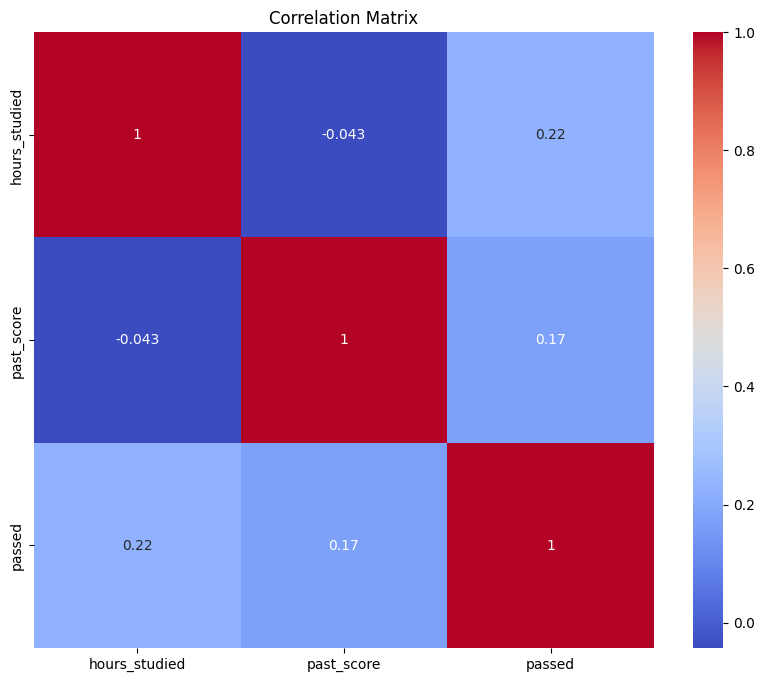

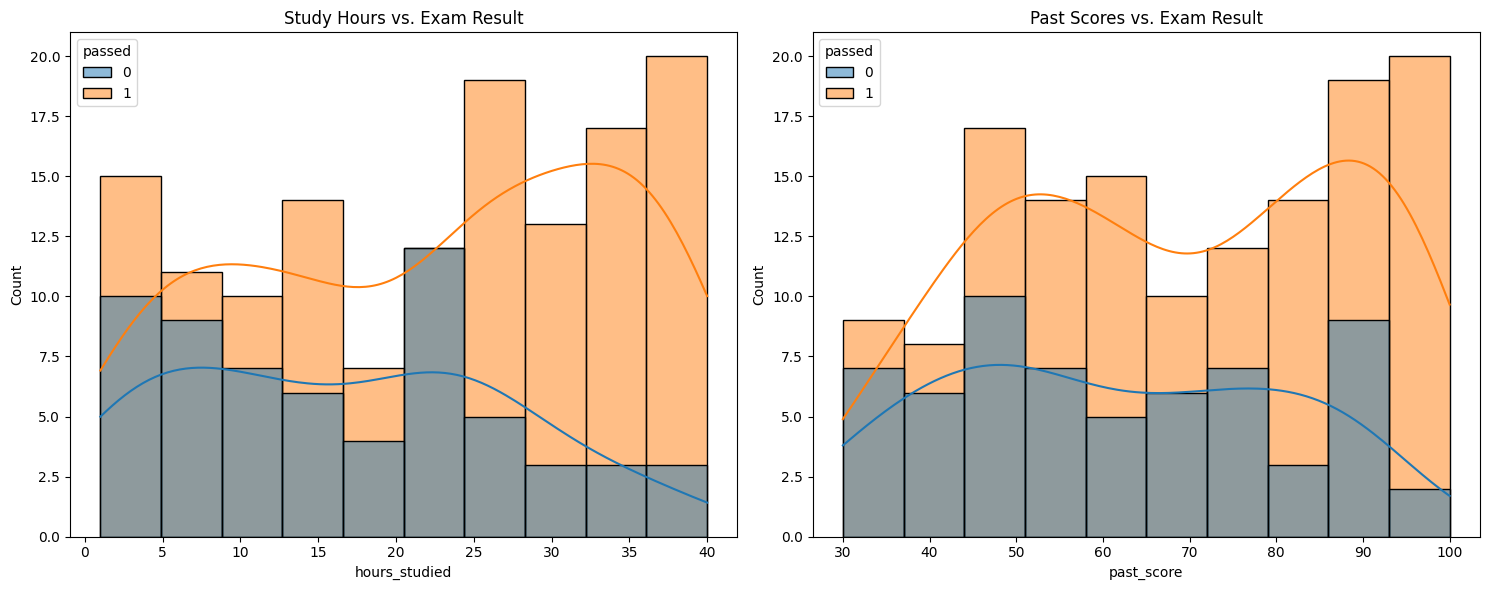


## Preparing Data for Modeling
Data prepared successfully!

## Training Prediction Model
Model training completed!

## Evaluating Model Performance
Model Accuracy: 0.725

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.71      1.00      0.83        27

    accuracy                           0.72        40
   macro avg       0.86      0.58      0.55        40
weighted avg       0.80      0.72      0.65        40



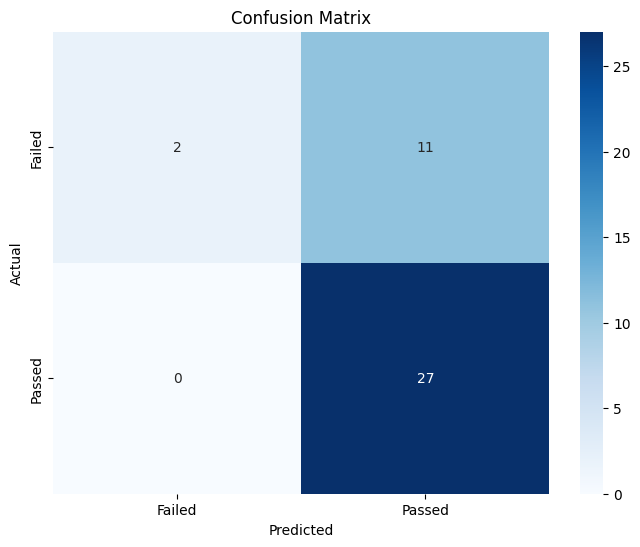

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


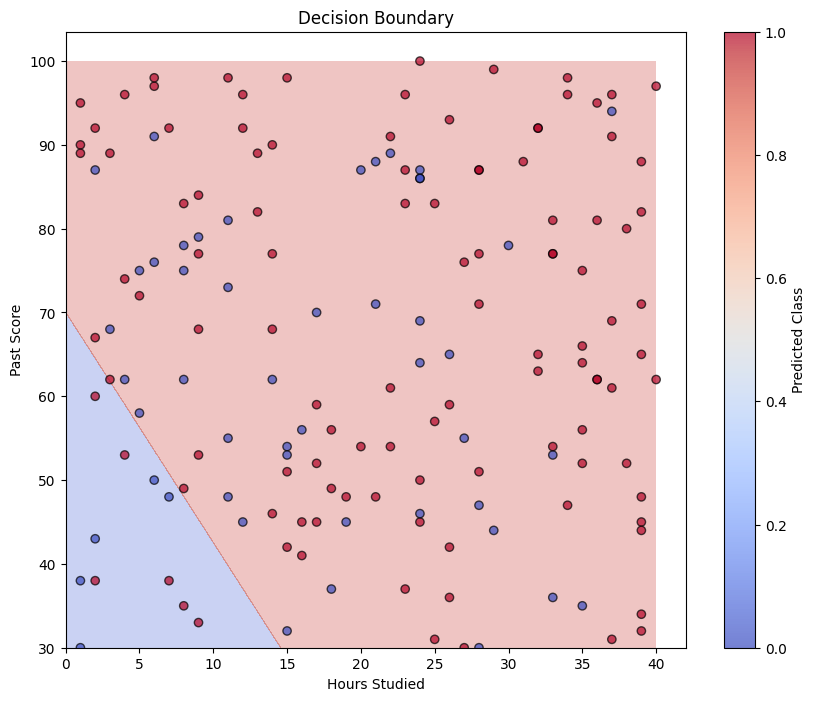


## Passing Probability Heatmap


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


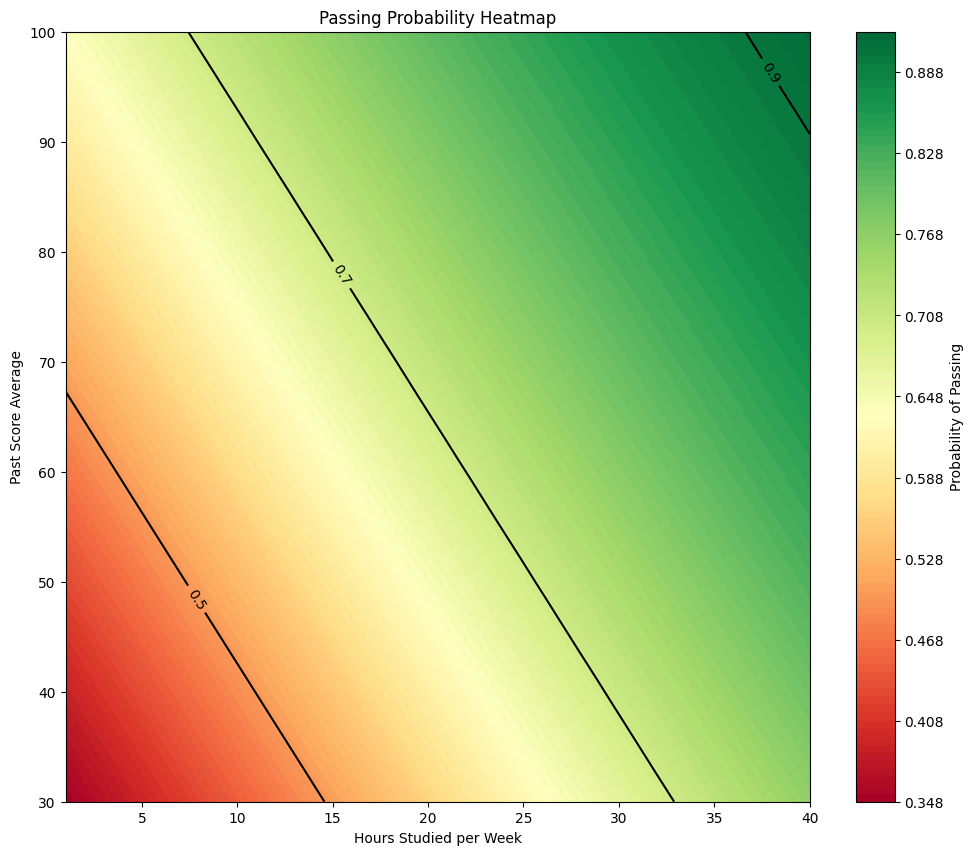


## Example Predictions
Predicting exam outcomes for different study patterns:
Example 1: 5 hours of study, past score of 60
   Probability of passing: 51.56%
   Predicted outcome: Pass

Example 2: 15 hours of study, past score of 70
   Probability of passing: 66.67%
   Predicted outcome: Pass

Example 3: 30 hours of study, past score of 80
   Probability of passing: 82.56%
   Predicted outcome: Pass


## How to Use This Model With Your Own Data

To predict passing probability for specific study hours and past score:

```python
# Example usage:
hours = 25  # Hours studied per week
score = 75  # Past average score

probability = predict_passing_probability(model, scaler, hours, score)
print(f"Probability of passing: {probability:.2%}")
```



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:

!pip install pandas numpy scikit-learn matplotlib seaborn


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from IPython.display import display, clear_output

# Mount Google Drive (optional - uncomment if you want to save results)
# drive.mount('/content/drive')

# Step 1: Create a sample dataset (in a real scenario, you would load your own data)
def create_sample_data(n_samples=100):
    np.random.seed(42)

    # Studying hours per week (between 1 and 40)
    hours_studied = np.random.randint(1, 41, n_samples)

    # Past exam scores (between 0 and 100)
    past_scores = np.random.randint(30, 101, n_samples)

    # Create some correlation between study habits, past scores and passing
    # This is a simplified model for demonstration
    pass_probability = 0.3 + 0.5 * (hours_studied / 40) + 0.2 * (past_scores / 100)
    passed = (np.random.random(n_samples) < pass_probability).astype(int)

    # Create DataFrame
    df = pd.DataFrame({
        'hours_studied': hours_studied,
        'past_score': past_scores,
        'passed': passed
    })

    return df

# Step 2: Load data and explore
def explore_data(df):
    print("Dataset shape:", df.shape)
    print("\nData preview:")
    display(df.head())

    print("\nData summary:")
    display(df.describe())

    print("\nCorrelation matrix:")
    display(df.corr())

    # Visualize correlation
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    # Visualize pass/fail distribution
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x='hours_studied', hue='passed', bins=10, kde=True)
    plt.title('Study Hours vs. Exam Result')

    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x='past_score', hue='passed', bins=10, kde=True)
    plt.title('Past Scores vs. Exam Result')

    plt.tight_layout()
    plt.show()

# Step 3: Prepare data for modeling
def prepare_data(df):
    # Split features and target
    X = df[['hours_studied', 'past_score']]
    y = df['passed']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, X_train, X_test

# Step 4: Train model
def train_model(X_train, y_train):
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    return model

# Step 5: Evaluate model
def evaluate_model(model, X_test, y_test, X_train, y_train, scaler):
    y_pred = model.predict(X_test)

    print("Model Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Failed', 'Passed'],
                yticklabels=['Failed', 'Passed'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Plot decision boundary
    plt.figure(figsize=(10, 8))

    # We need to get back the unscaled features for interpretability
    # Create a meshgrid
    h = .02  # step size in the mesh
    x_min, x_max = 0, 40
    y_min, y_max = 30, 100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Scale the meshgrid points
    meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
    meshgrid_points_scaled = scaler.transform(meshgrid_points)

    # Predict
    Z = model.predict(meshgrid_points_scaled)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # Plot original points
    X_train_orig = scaler.inverse_transform(X_train)
    plt.scatter(X_train_orig[:, 0], X_train_orig[:, 1], c=y_train,
                edgecolor='k', cmap='coolwarm', alpha=0.7)

    plt.xlabel('Hours Studied')
    plt.ylabel('Past Score')
    plt.title('Decision Boundary')
    plt.colorbar(label='Predicted Class')
    plt.show()

# Step 6: Make predictions for new data
def predict_passing_probability(model, scaler, hours_studied, past_score):
    # Scale the new data
    new_data = np.array([[hours_studied, past_score]])
    new_data_scaled = scaler.transform(new_data)

    # Predict probability of passing
    passing_probability = model.predict_proba(new_data_scaled)[0][1]

    return passing_probability

# Step 7: Create a heatmap showing passing probabilities for different study hour/score combinations
def create_probability_heatmap(model, scaler):
    # Create a grid of values
    hours = np.linspace(1, 40, 20)
    scores = np.linspace(30, 100, 20)

    # Meshgrid for all combinations
    xx, yy = np.meshgrid(hours, scores)

    # Reshape for prediction
    grid_points = np.vstack([xx.ravel(), yy.ravel()]).T

    # Scale points
    grid_points_scaled = scaler.transform(grid_points)

    # Get probabilities
    probabilities = model.predict_proba(grid_points_scaled)[:, 1]

    # Reshape back to grid
    prob_grid = probabilities.reshape(xx.shape)

    # Plot heatmap
    plt.figure(figsize=(12, 10))
    plt.contourf(xx, yy, prob_grid, 100, cmap='RdYlGn')
    plt.colorbar(label='Probability of Passing')
    plt.xlabel('Hours Studied per Week')
    plt.ylabel('Past Score Average')
    plt.title('Passing Probability Heatmap')

    # Add contour lines at specific probabilities
    contour_levels = [0.3, 0.5, 0.7, 0.9]
    contour = plt.contour(xx, yy, prob_grid, contour_levels, colors='black')
    plt.clabel(contour, inline=True, fontsize=10, fmt='%.1f')

    plt.show()

# Example of how to predict on new data manually
def example_predictions(model, scaler):
    # Example cases
    example_data = [
        {'hours': 5, 'score': 60},
        {'hours': 15, 'score': 70},
        {'hours': 30, 'score': 80}
    ]

    print("\n## Example Predictions")
    print("Predicting exam outcomes for different study patterns:")

    for i, ex in enumerate(example_data):
        prob = predict_passing_probability(model, scaler, ex['hours'], ex['score'])
        print(f"Example {i+1}: {ex['hours']} hours of study, past score of {ex['score']}")
        print(f"   Probability of passing: {prob:.2%}")
        print(f"   Predicted outcome: {'Pass' if prob > 0.5 else 'Fail'}")
        print()

# Main execution for Colab
print("# Exam Pass Prediction Model")
print("This notebook predicts likelihood of passing an exam based on study habits and past scores.")

# Generate sample data
print("\n## Generating and Exploring Sample Data")
df = create_sample_data(200)
explore_data(df)

# Prepare data
print("\n## Preparing Data for Modeling")
X_train_scaled, X_test_scaled, y_train, y_test, scaler, X_train, X_test = prepare_data(df)
print("Data prepared successfully!")

# Train model
print("\n## Training Prediction Model")
model = train_model(X_train_scaled, y_train)
print("Model training completed!")

# Evaluate model
print("\n## Evaluating Model Performance")
evaluate_model(model, X_test_scaled, y_test, X_train_scaled, y_train, scaler)

# Create probability heatmap
print("\n## Passing Probability Heatmap")
create_probability_heatmap(model, scaler)

# Show example predictions
example_predictions(model, scaler)

# Optional: Save model for later use
# from joblib import dump
# dump(model, '/content/drive/MyDrive/exam_model.joblib')
# dump(scaler, '/content/drive/MyDrive/exam_scaler.joblib')
# print("Model saved to Google Drive!")

print("\n## How to Use This Model With Your Own Data")
print("""
To predict passing probability for specific study hours and past score:

```python
# Example usage:
hours = 25  # Hours studied per week
score = 75  # Past average score

probability = predict_passing_probability(model, scaler, hours, score)
print(f"Probability of passing: {probability:.2%}")
```
""")

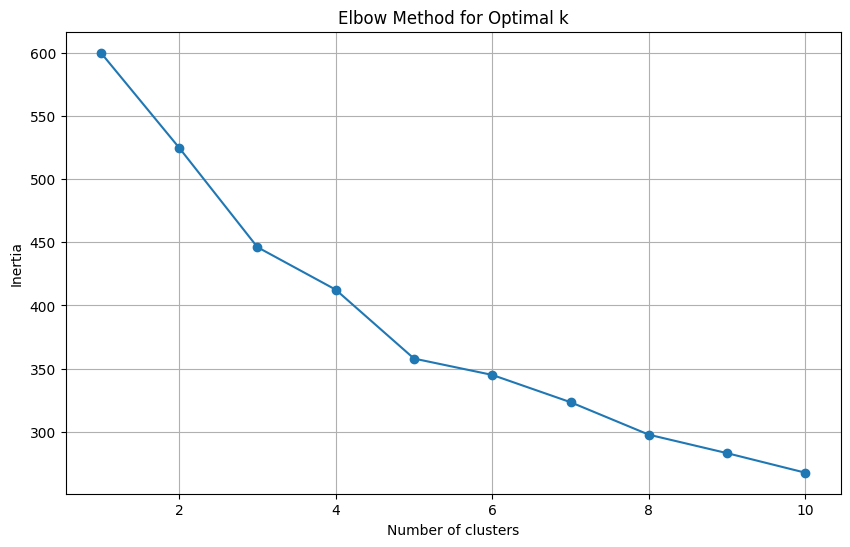

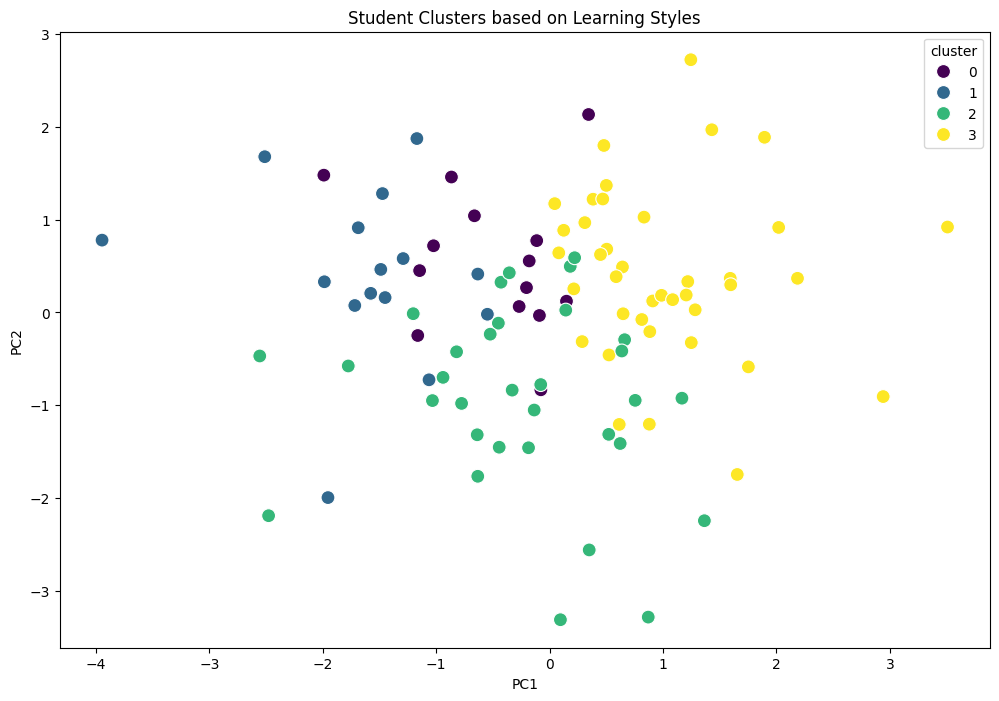

Cluster centers (original scale):
   visual_learning  auditory_learning  reading_writing  kinesthetic_learning  \
0        33.706084          51.310281        37.742626             48.679097   
1        40.455795          46.987789        42.257827             66.437615   
2        51.896065          63.390452        48.648498             49.700947   
3        53.970103          40.559017        60.783008             48.506623   

   pace_of_learning  assignment_completion  
0         38.959079              46.772460  
1         68.024120              57.280413  
2         55.685419              42.031948  
3         40.212077              50.461504  

Number of students in each cluster:
cluster
0    14
1    15
2    32
3    39
Name: count, dtype: int64

Cluster 0 characteristics:
visual_learning: 33.71
auditory_learning: 51.31
reading_writing: 37.74
kinesthetic_learning: 48.68
pace_of_learning: 38.96
assignment_completion: 46.77

Cluster 1 characteristics:
visual_learning: 40.46
audito

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Generate sample student data
np.random.seed(42)

# Number of students
n_students = 100

# Create features representing different learning characteristics
visual_learning = np.random.normal(50, 15, n_students)
auditory_learning = np.random.normal(50, 15, n_students)
reading_writing = np.random.normal(50, 15, n_students)
kinesthetic_learning = np.random.normal(50, 15, n_students)
pace_of_learning = np.random.normal(50, 15, n_students)
assignment_completion = np.random.normal(50, 15, n_students)

# Create a DataFrame
students_df = pd.DataFrame({
    'student_id': range(1, n_students + 1),
    'visual_learning': np.clip(visual_learning, 0, 100),
    'auditory_learning': np.clip(auditory_learning, 0, 100),
    'reading_writing': np.clip(reading_writing, 0, 100),
    'kinesthetic_learning': np.clip(kinesthetic_learning, 0, 100),
    'pace_of_learning': np.clip(pace_of_learning, 0, 100),
    'assignment_completion': np.clip(assignment_completion, 0, 100)
})

# Prepare data for clustering
X = students_df.drop('student_id', axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters using the elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Apply K-means with chosen number of clusters (k=4 based on elbow method)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
students_df['cluster'] = kmeans.fit_predict(X_scaled)

# Get cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                              columns=X.columns)

# Apply PCA for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = students_df['cluster']

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', s=100)
plt.title('Student Clusters based on Learning Styles')
plt.show()

# Display cluster information
print("Cluster centers (original scale):")
print(cluster_centers)

# Count students in each cluster
cluster_counts = students_df['cluster'].value_counts().sort_index()
print("\nNumber of students in each cluster:")
print(cluster_counts)

# Characterize the clusters based on their centers
for i in range(k):
    print(f"\nCluster {i} characteristics:")
    for col in X.columns:
        print(f"{col}: {cluster_centers.iloc[i][col]:.2f}")

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory
from google.colab import files
import time
import zipfile
from IPython.display import display, clear_output

# Check if GPU is available
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Configuration parameters
BATCH_SIZE = 64
IMAGE_SIZE = 64  # Size of the images
CHANNELS = 3  # RGB
LATENT_DIM = 100  # Dimension of the generator input noise
EPOCHS = 100
SAMPLE_INTERVAL = 5  # Generate and save images every n epochs

# Create directories for saving models and generated images
os.makedirs('generated_images', exist_ok=True)
os.makedirs('saved_models', exist_ok=True)

# Helper function for data preparation
def prepare_dataset(dataset_path):
    """
    Function to prepare the dataset from a directory or uploaded zip file.
    """
    # If dataset_path is None, prompt for upload
    if dataset_path is None:
        print("Please upload a zip file containing your artwork images.")
        uploaded = files.upload()
        if not uploaded:
            print("No file uploaded. Using a sample dataset.")
            return None

        # Get the filename of the uploaded file
        zip_filename = list(uploaded.keys())[0]

        # Extract the zip file
        with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
            zip_ref.extractall('artwork_dataset')

        dataset_path = 'artwork_dataset'

    # Load dataset from directory
    try:
        dataset = image_dataset_from_directory(
            dataset_path,
            batch_size=BATCH_SIZE,
            image_size=(IMAGE_SIZE, IMAGE_SIZE),
            shuffle=True
        )

        # Normalize images to [-1, 1]
        normalization_layer = layers.Rescaling(scale=1./127.5, offset=-1)
        normalized_dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

        return normalized_dataset

    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# Build the generator model
def build_generator():
    """
    The generator model that creates new images from random noise.
    """
    model = Sequential([
        # Start with a Dense layer connected to a reshaping layer
        layers.Dense(8 * 8 * 256, use_bias=False, input_shape=(LATENT_DIM,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((8, 8, 256)),

        # First upsampling block
        layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        # Second upsampling block
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        # Third upsampling block
        layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),

        # Output layer with tanh activation
        layers.Conv2DTranspose(CHANNELS, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh')
    ])

    return model

# Build the discriminator model
def build_discriminator():
    """
    The discriminator model that distinguishes between real and generated images.
    """
    model = Sequential([
        # First convolution block
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[IMAGE_SIZE, IMAGE_SIZE, CHANNELS]),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),

        # Second convolution block
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),

        # Third convolution block
        layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),

        # Flatten and output
        layers.Flatten(),
        layers.Dense(1)
    ])

    return model

# Loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Function to generate and save images
def generate_and_save_images(model, epoch, test_input):
    # Generate images
    predictions = model(test_input, training=False)

    # Rescale images to [0, 1]
    predictions = (predictions + 1) / 2.0

    # Plot images
    plt.figure(figsize=(8, 8))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i])
        plt.axis('off')

    # Save the figure
    plt.savefig(f'generated_images/image_at_epoch_{epoch:04d}.png')
    plt.close()

    # Display most recent image
    display(plt.imread(f'generated_images/image_at_epoch_{epoch:04d}.png'))

# Training loop
@tf.function
def train_step(images, generator, discriminator, generator_optimizer, discriminator_optimizer):
    # Generate random noise for the generator
    noise = tf.random.normal([BATCH_SIZE, LATENT_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # Generate images
        generated_images = generator(noise, training=True)

        # Get discriminator outputs
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        # Calculate losses
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    # Calculate gradients
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Apply gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Main function to train the GAN
def train_gan(dataset=None):
    # Build models
    generator = build_generator()
    discriminator = build_discriminator()

    # Define optimizers
    generator_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    discriminator_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)

    # Prepare the dataset
    dataset = prepare_dataset(dataset)

    if dataset is None:
        print("No dataset available. Please provide a valid dataset.")
        return

    # Create fixed noise for image generation
    seed = tf.random.normal([16, LATENT_DIM])

    # Training loop
    gen_losses = []
    disc_losses = []

    start_time = time.time()

    for epoch in range(EPOCHS):
        epoch_start = time.time()
        gen_loss_epoch = 0
        disc_loss_epoch = 0
        steps = 0

        for image_batch, _ in dataset:
            if image_batch.shape[0] < BATCH_SIZE:
                # Skip incomplete batches
                continue

            g_loss, d_loss = train_step(image_batch, generator, discriminator, generator_optimizer, discriminator_optimizer)
            gen_loss_epoch += g_loss
            disc_loss_epoch += d_loss
            steps += 1

        # Calculate average loss for this epoch
        if steps > 0:
            gen_loss_epoch /= steps
            disc_loss_epoch /= steps
            gen_losses.append(gen_loss_epoch)
            disc_losses.append(disc_loss_epoch)

        # Generate and save images
        if (epoch + 1) % SAMPLE_INTERVAL == 0 or epoch == 0:
            clear_output(wait=True)
            print(f"Epoch {epoch+1}/{EPOCHS}, Generator Loss: {gen_loss_epoch:.4f}, Discriminator Loss: {disc_loss_epoch:.4f}")
            print(f"Time for epoch {epoch+1}: {time.time()-epoch_start:.2f} sec")

            generate_and_save_images(generator, epoch + 1, seed)

        # Save models periodically
        if (epoch + 1) % 20 == 0:
            generator.save(f'saved_models/generator_epoch_{epoch+1}.h5')
            discriminator.save(f'saved_models/discriminator_epoch_{epoch+1}.h5')

    # Save final models
    generator.save('saved_models/generator_final.h5')
    discriminator.save('saved_models/discriminator_final.h5')

    # Plot training losses
    plt.figure(figsize=(10, 5))
    plt.plot(gen_losses, label='Generator Loss')
    plt.plot(disc_losses, label='Discriminator Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('training_losses.png')
    plt.show()

    print(f"Total training time: {time.time()-start_time:.2f} seconds")
    return generator, discriminator

# Function to generate art with a trained generator
def generate_artwork(generator, num_images=16, grid_size=(4, 4)):
    """
    Generate artwork using a trained generator model.
    """
    # Create random noise
    random_noise = tf.random.normal([num_images, LATENT_DIM])

    # Generate images
    generated_images = generator(random_noise, training=False)

    # Rescale images to [0, 1]
    generated_images = (generated_images + 1) / 2.0

    # Plot images in a grid
    rows, cols = grid_size
    plt.figure(figsize=(cols * 2, rows * 2))

    for i in range(num_images):
        plt.subplot(rows, cols, i+1)
        plt.imshow(generated_images[i])
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('generated_artwork.png')
    plt.show()

    return generated_images

# Function to load a trained model
def load_model(model_path):
    """
    Load a previously trained model.
    """
    try:
        model = tf.keras.models.load_model(model_path)
        print(f"Model loaded successfully from {model_path}")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

# Function to create interpolated images between two points in latent space
def create_latent_space_interpolation(generator, steps=10):
    """
    Create a smooth transition between two points in the latent space.
    """
    # Create two random points in the latent space
    z1 = tf.random.normal([1, LATENT_DIM])
    z2 = tf.random.normal([1, LATENT_DIM])

    # Create interpolated points
    alphas = np.linspace(0, 1, steps)
    interpolated_images = []

    for alpha in alphas:
        z_interp = alpha * z1 + (1 - alpha) * z2
        img = generator(z_interp, training=False)
        img = (img + 1) / 2.0  # Rescale to [0, 1]
        interpolated_images.append(img[0])

    # Plot interpolated images
    plt.figure(figsize=(steps * 2, 2))
    for i, img in enumerate(interpolated_images):
        plt.subplot(1, steps, i+1)
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('latent_space_interpolation.png')
    plt.show()

    return interpolated_images